<h1>Formulas for Final Data Calculations</h1>

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
drugs = pd.read_csv("Possesions.csv", sep=",")
arrests = pd.read_csv("sortedArrestData.csv", sep=",")
money = pd.read_csv("money.csv", sep=",")

In [17]:

money["Neighborhood"] = money["Neighborhood"].str.lower()
arrests["Locations"] = arrests["Locations"].str.lower()
drugs["Location"] = drugs["Location"].str.lower()

moneyLoc = money['Neighborhood'].tolist()
drugLoc = drugs['Location'].tolist()
arrestLoc = arrests['Locations'].tolist()      

moneyLoc = [str(x).lower() for x in moneyLoc]
drugLoc = [str(x).lower() for x in drugLoc]
arrestLoc = [str(x).lower() for x in arrestLoc]

moneyLoc.sort()
drugLoc.sort()
arrestLoc.sort()

Biglist = []
for each in moneyLoc:
    if each in moneyLoc and each in arrestLoc and each in drugLoc:
        Biglist.append(each)

meanArrests = arrests["Numbers"].mean().item()

,Location,Drug Points
18,central northside,3236.677
74,squirrel hill north,1207.777
76,st. clair,890.778
64,regent square,760.541
61,point breeze,653.582
...,...,...
78,strip district,113.878
22,crafton heights,113.301
58,overbrook,106.348
26,east carnegie,97.471


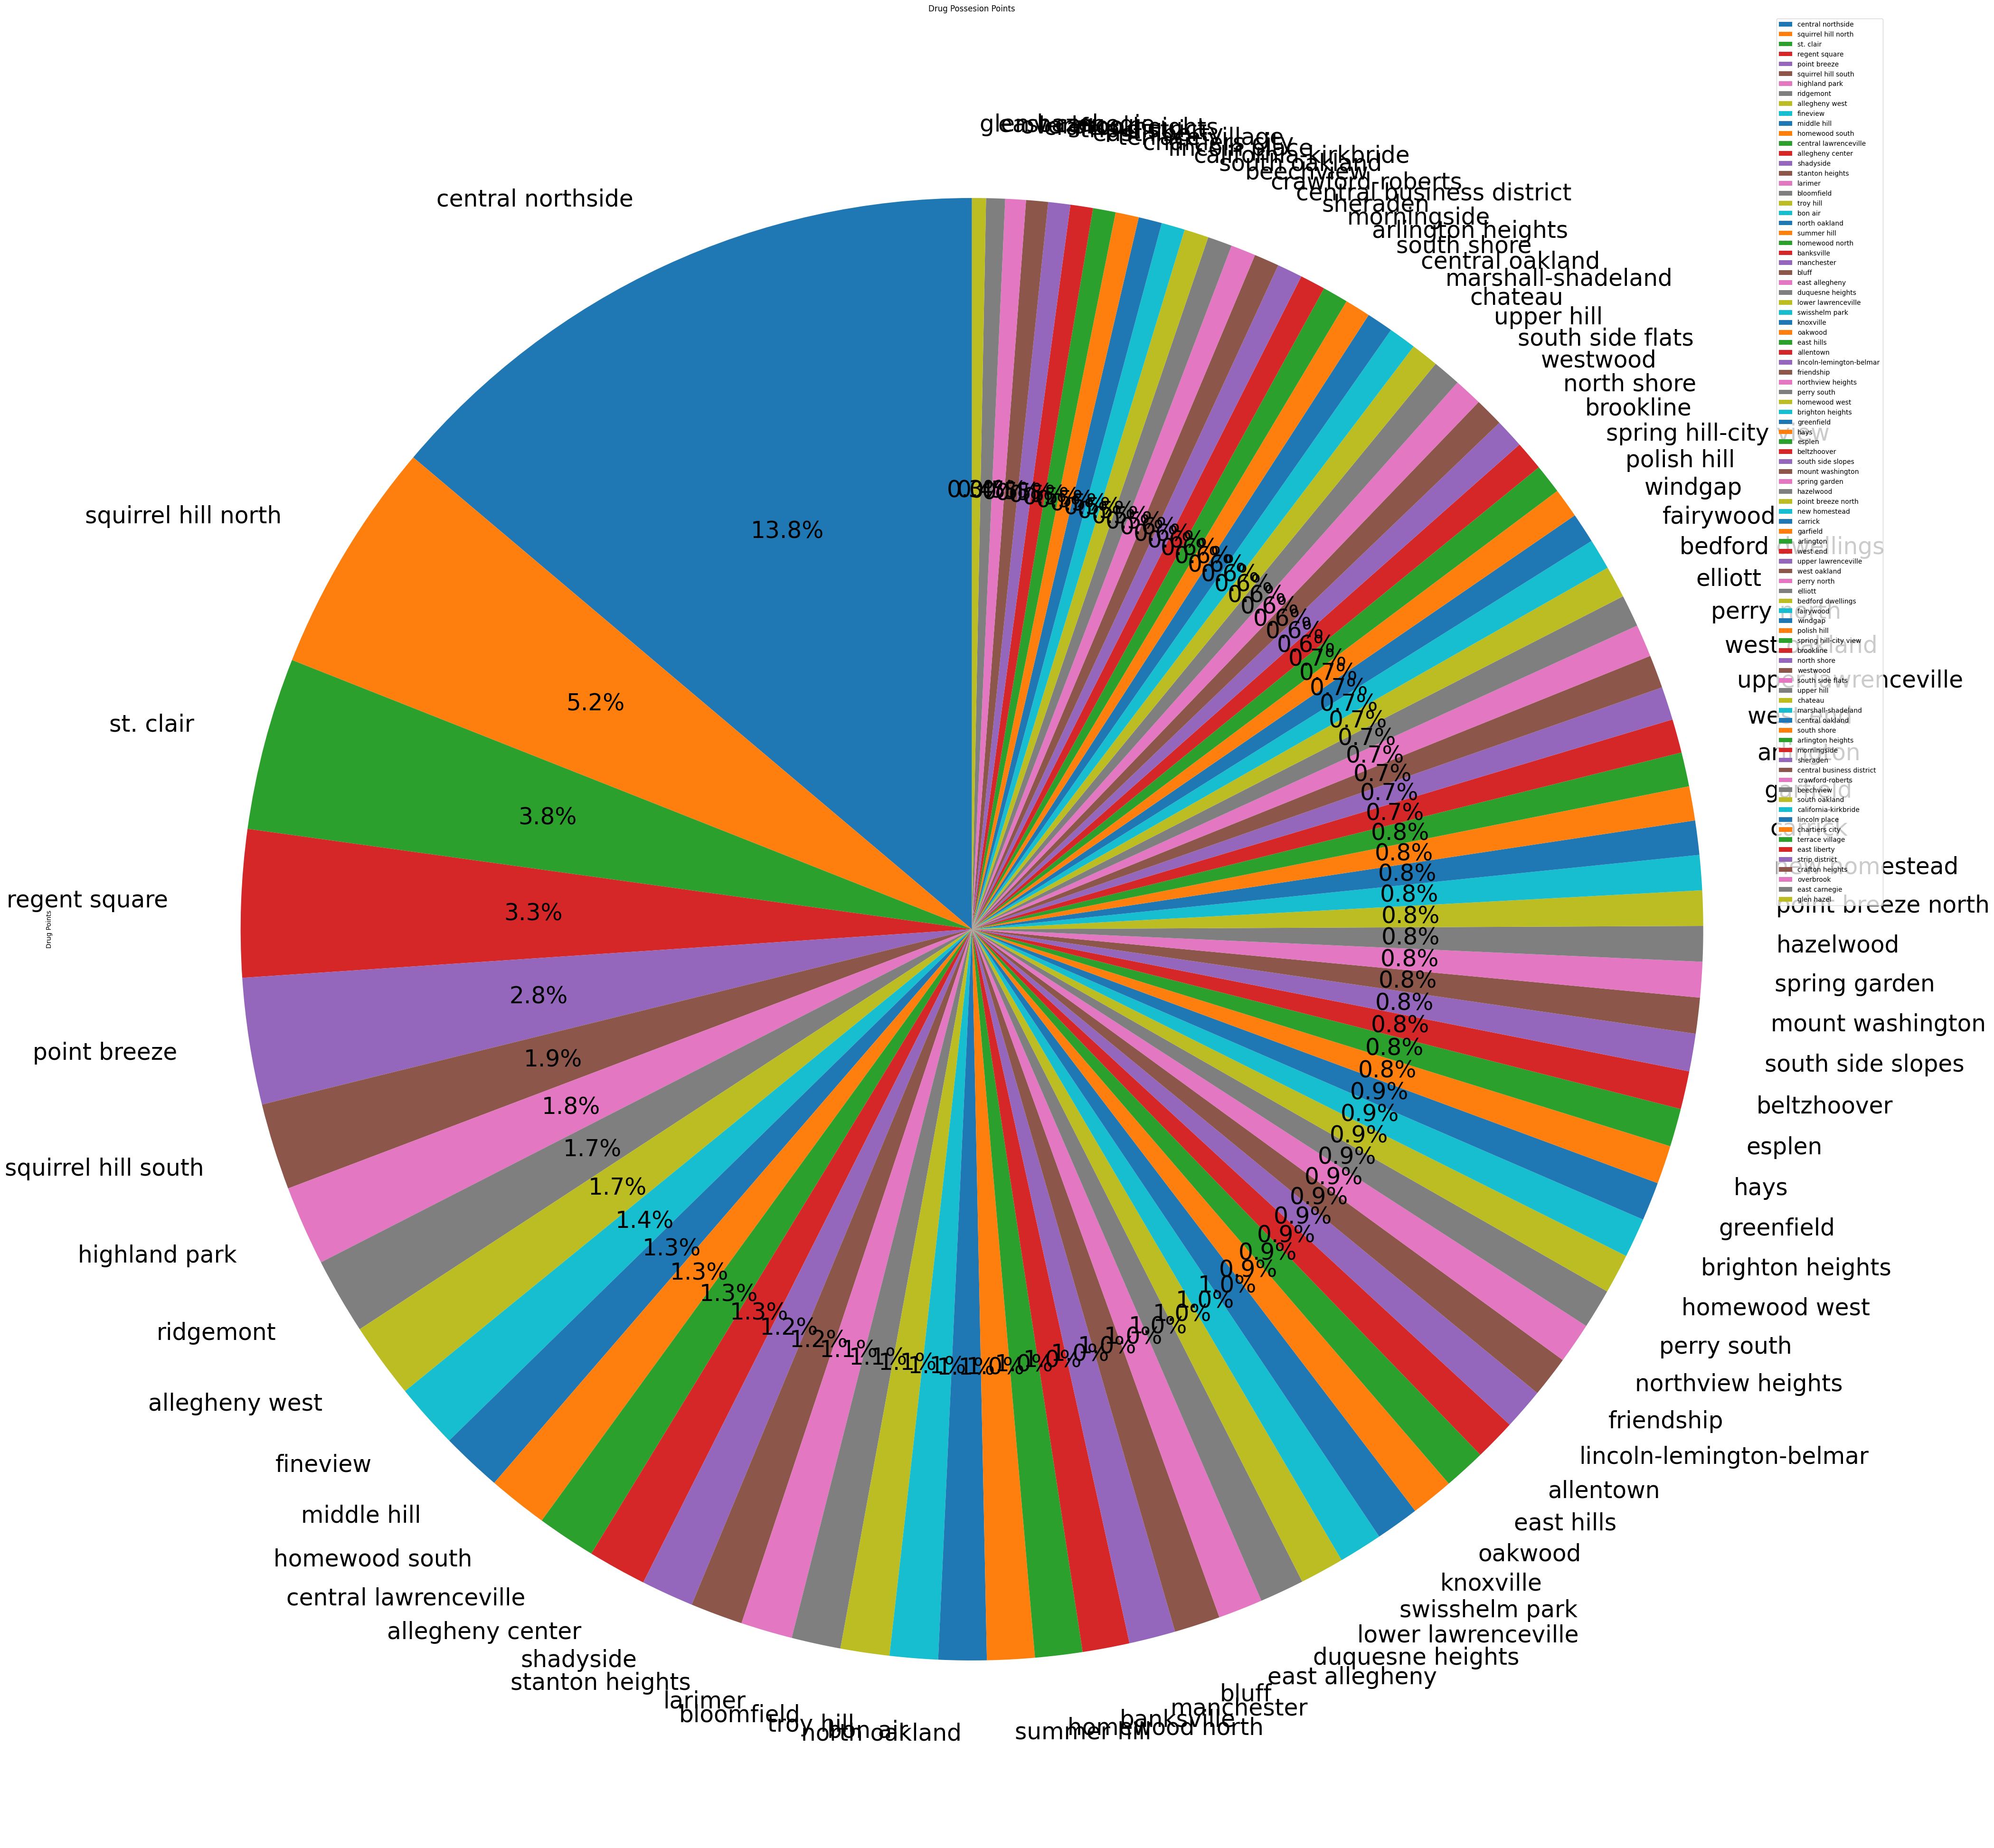

In [33]:

finalScores = {}
for x in range(len(Biglist)):
    tempString = Biglist[x]
    if tempString in moneyLoc and tempString in arrestLoc and tempString in drugLoc:
        temp1 = int(money[money["Neighborhood"]== tempString].index.values)
        temp2 = int(arrests[arrests["Locations"]== tempString].index.values)
        temp3 = int(drugs[drugs["Location"]== tempString].index.values)
        finalScores[tempString] = round(((0.5*int(money["Estimate; Total: - $200,000 or more"][temp1])) + (2 * int(drugs["Drug Possesions"][temp3]))) * ((meanArrests)/ (int(arrests["Numbers"][temp2]))), 3)

points = list(finalScores.values())
local = list(finalScores.keys())
DrugPoints = pd.DataFrame(list(zip(local, points)), columns=["Location","Drug Points"])
DrugPoints = DrugPoints.sort_values(by=["Drug Points"],ascending=False)
display(DrugPoints)



